In [34]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

In [35]:
binary = os.path.join(os.getcwd(), 'data', 'volve_compiled.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    data = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/data/volve_compiled.pkl


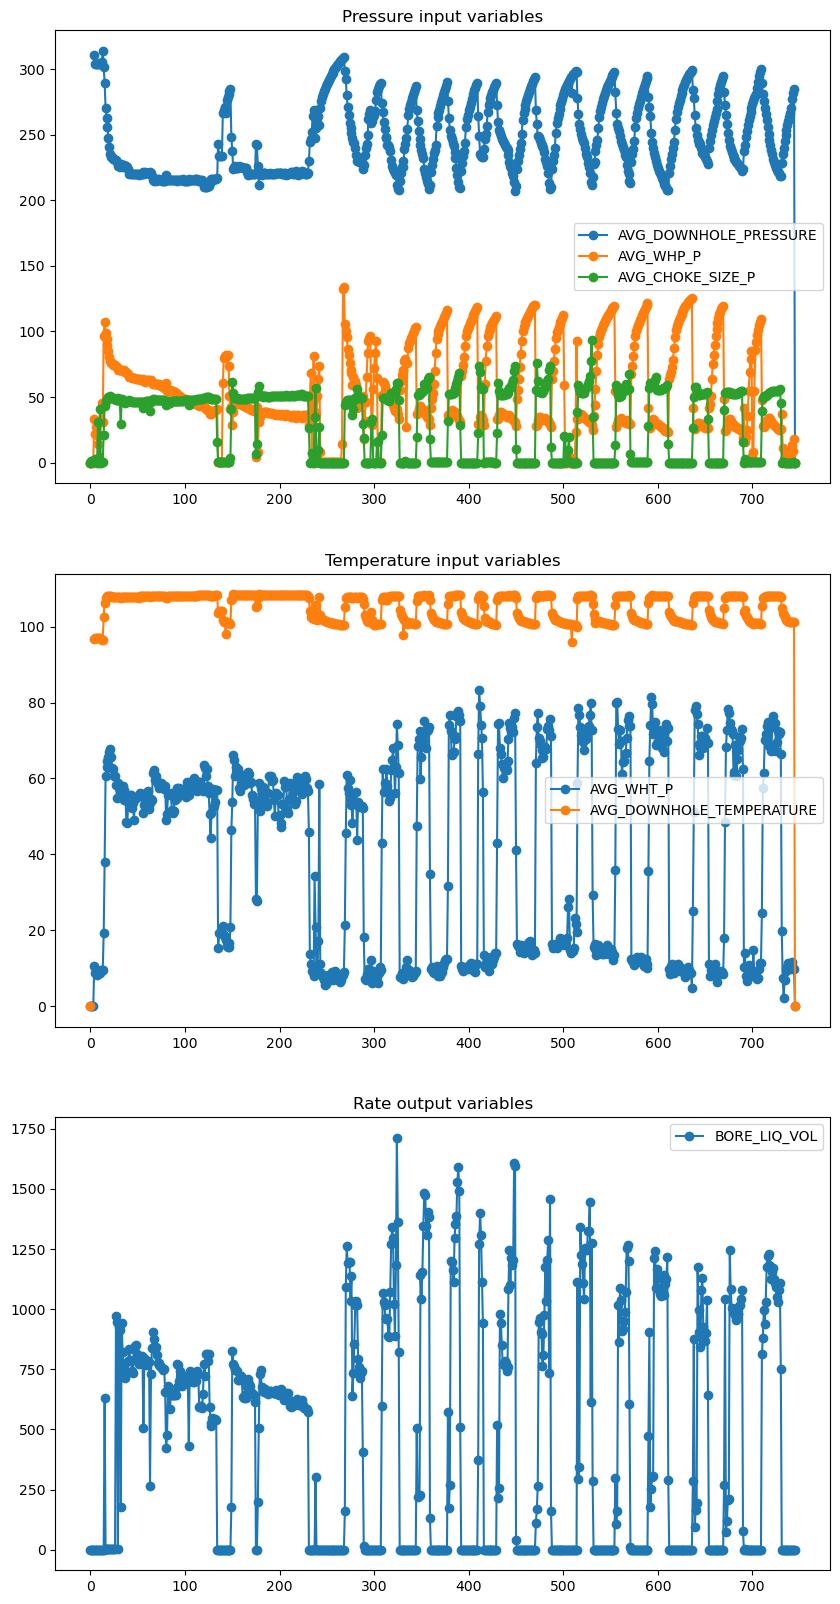

In [36]:
case = "15/9-F-1 C"
#case = "15/9-F-11"

data_case = data['OP'][case]

filt_vars_IN_Q =  [
        #'BORE_OIL_VOL',
        #'BORE_GAS_VOL',
        #'BORE_WAT_VOL',
        #'BORE_OIL_CUM',
        #'BORE_LIQ_CUM',
        #'BORE_GAS_CUM',
        #'BORE_WAT_CUM',
]

filt_vars_IN_QINJ = [
        'BORE_WI_VOL',
        'BORE_WI_CUM',
]

filt_vars_IN_P = [
        'AVG_DOWNHOLE_PRESSURE',
        'AVG_WHP_P',
        #'AVG_DP_TUBING',
        #'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        #'DP_CHOKE_SIZE',
]

filt_vars_IN_T = [
        'AVG_WHT_P',
        'AVG_DOWNHOLE_TEMPERATURE',
]

filt_vars_OUT = [
        #'BORE_OIL_VOL',
        'BORE_LIQ_VOL',
        #'BORE_GAS_VOL',
        #'BORE_WAT_VOL',
]

time = data_case['N']
fig, ax = plt.subplots(3,1, figsize=(10, 20))
for var in filt_vars_IN_P:
    ax[0].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_IN_T:
    ax[1].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_OUT:
    ax[2].plot(time, data_case[var], '-o', label=var)
#for var in filt_vars_OUT:
#    ax[3].plot(time, data_case[var], '-o', label=var)
ax[0].set_title(f'Pressure input variables')
ax[1].set_title(f'Temperature input variables')
ax[2].set_title(f'Rate output variables')
ax[0].legend()
ax[1].legend()
ax[2].legend()
#ax[3].legend()

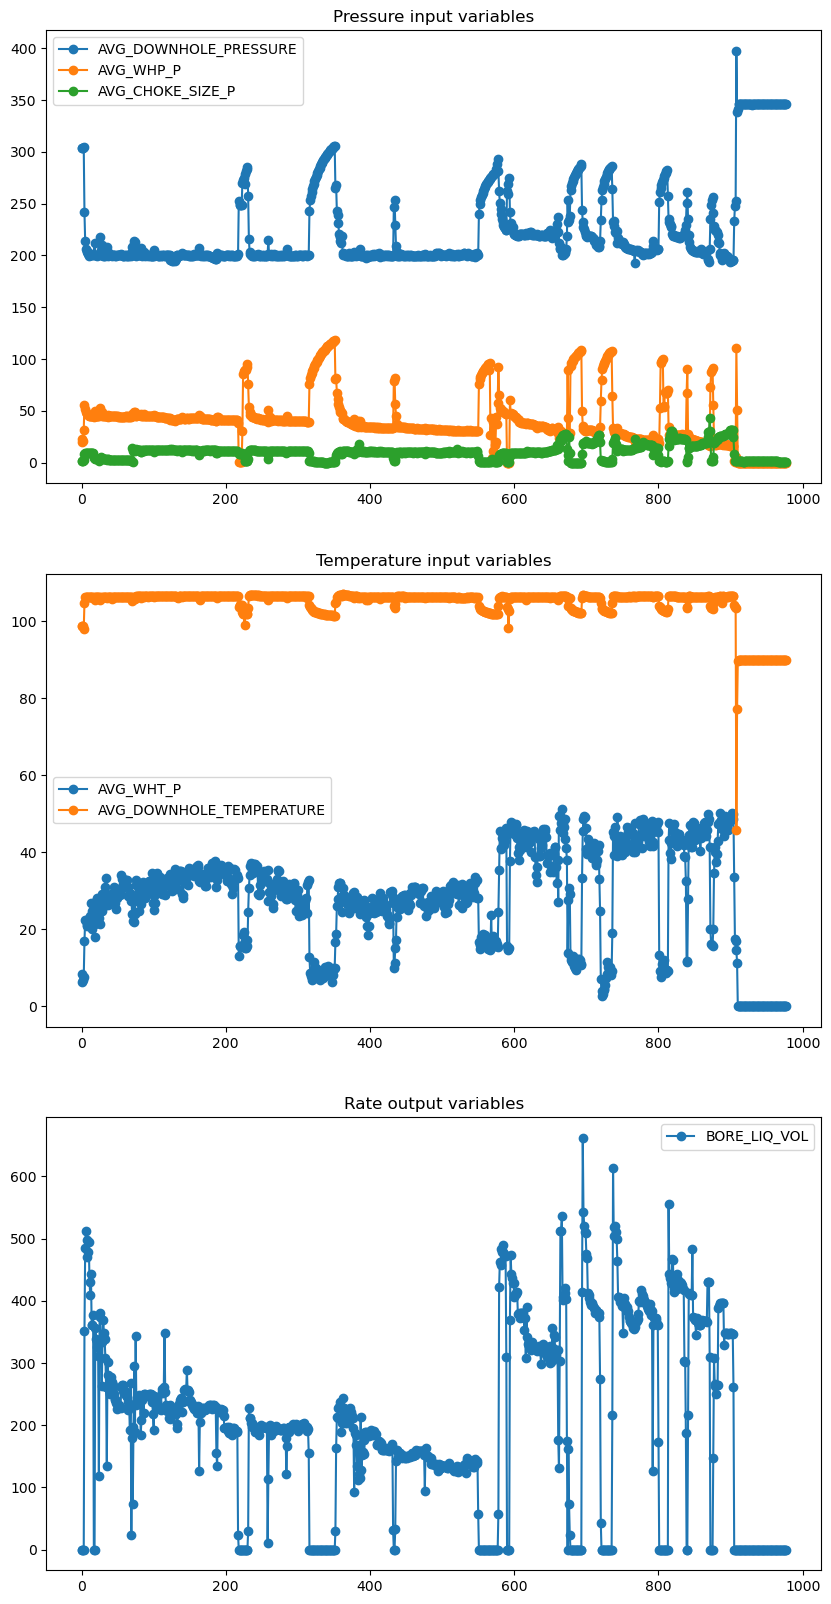

In [37]:
case = "15/9-F-15 D"
#case = "15/9-F-11"

data_case = data['OP'][case]

filt_vars_IN_Q =  [
        #'BORE_OIL_VOL',
        #'BORE_GAS_VOL',
        #'BORE_WAT_VOL',
        #'BORE_OIL_CUM',
        #'BORE_LIQ_CUM',
        #'BORE_GAS_CUM',
        #'BORE_WAT_CUM',
]

filt_vars_IN_QINJ = [
        'BORE_WI_VOL',
        'BORE_WI_CUM',
]

filt_vars_IN_P = [
        'AVG_DOWNHOLE_PRESSURE',
        'AVG_WHP_P',
        #'AVG_DP_TUBING',
        #'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        #'DP_CHOKE_SIZE',
]

filt_vars_IN_T = [
        'AVG_WHT_P',
        'AVG_DOWNHOLE_TEMPERATURE',
]

filt_vars_OUT = [
        #'BORE_OIL_VOL',
        'BORE_LIQ_VOL',
        #'BORE_GAS_VOL',
        #'BORE_WAT_VOL',
]

time = data_case['N']
fig, ax = plt.subplots(3,1, figsize=(10, 20))
for var in filt_vars_IN_P:
    ax[0].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_IN_T:
    ax[1].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_OUT:
    ax[2].plot(time, data_case[var], '-o', label=var)
#for var in filt_vars_OUT:
#    ax[3].plot(time, data_case[var], '-o', label=var)
ax[0].set_title(f'Pressure input variables')
ax[1].set_title(f'Temperature input variables')
ax[2].set_title(f'Rate output variables')
ax[0].legend()
ax[1].legend()
ax[2].legend()
#ax[3].legend()

In [38]:
prefix = 'MISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/outputs/MISO.W1_ml.pkl


In [39]:
yhats = []
for index, row in pd.DataFrame(results).iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])


In [40]:
prefix = 'SISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/outputs/SISO.W1_ml.pkl


In [41]:
for index, row in pd.DataFrame(results).iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])

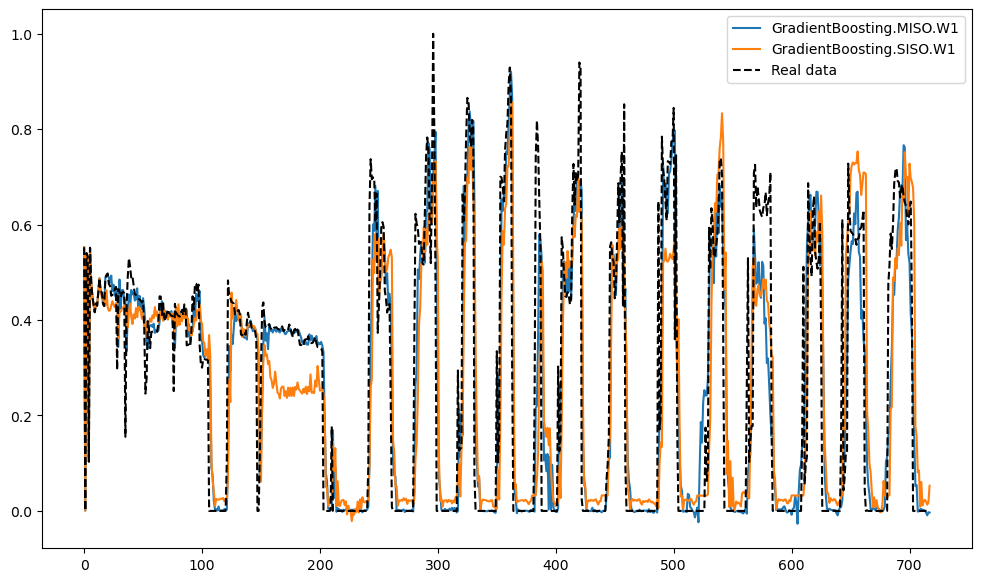

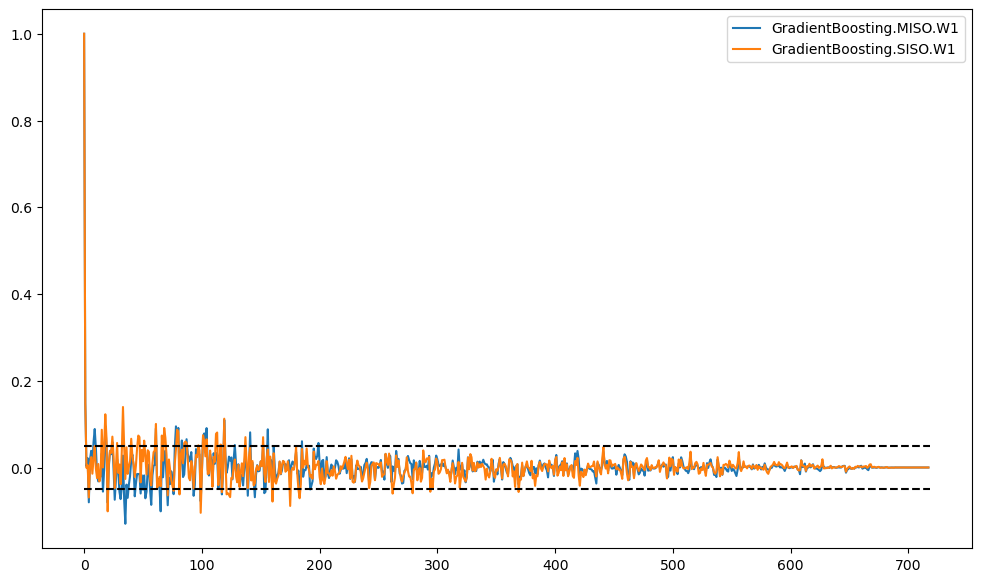

In [42]:
fig, ax   = plt.subplots(1,1, figsize=(12,7))
fig2, ax2 = plt.subplots(1,1, figsize=(12,7))
for model, yhat, yhat_OSA in yhats:
    if not 'GradientBoosting' in model: continue
    ax.plot(yhat, label=model)
    ee = compute_residues_autocorrelation(y_te, yhat_OSA)
    ax2.plot(ee[0], label=model)
ax.plot(y_te, 'k--', label='Real data')
ax.legend()
ax2.legend()
ax2.set_xlabel('$\phi_{\epsilon\epsilon}$')
ax2.hlines(0.05, 0, len(y_te), 'k', 'dashed')
ax2.hlines(-0.05, 0, len(y_te), 'k', 'dashed')

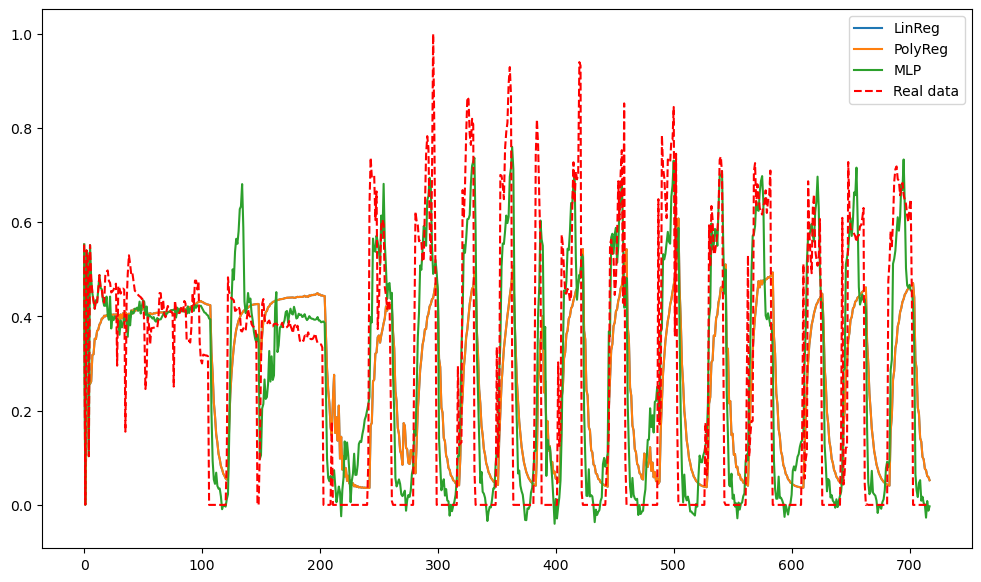

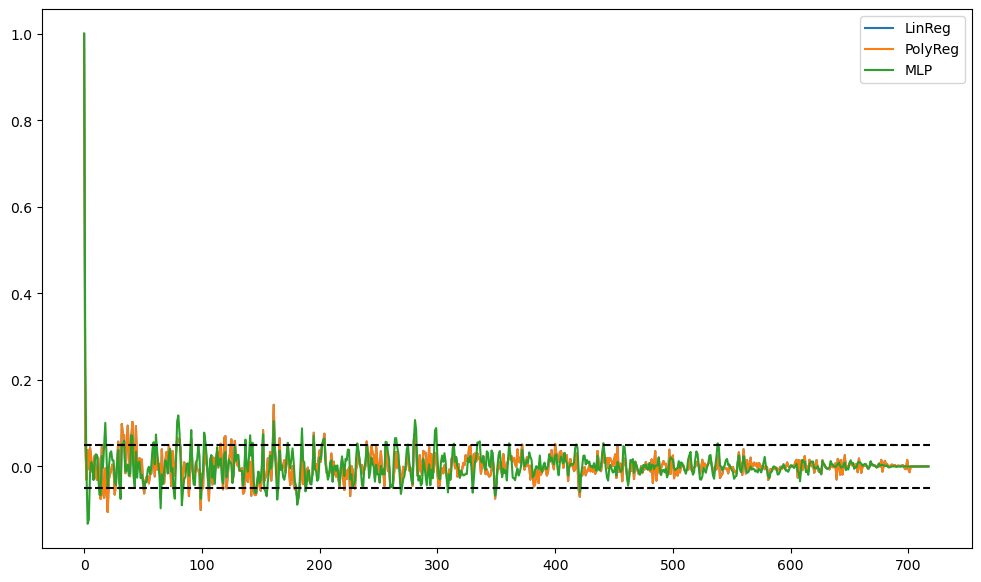

In [43]:
fig, ax   = plt.subplots(1,1, figsize=(12,7))
fig2, ax2 = plt.subplots(1,1, figsize=(12,7))
for model, yhat, yhat_OSA in yhats:
    if not 'SISO' in model: continue
    model_name = model.split('.')[0]
    if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    ax.plot(yhat, label=model_name)
    ee = compute_residues_autocorrelation(y_te, yhat_OSA)
    ax2.plot(ee[0], label=model_name)
ax.plot(y_te, 'r--', label='Real data')
ax.legend()
ax2.legend()
ax2.hlines(0.05, 0, len(y_te), 'k', 'dashed')
ax2.hlines(-0.05, 0, len(y_te), 'k', 'dashed')

In [27]:
prefix = 'MISO.W2'
binary = os.path.join(os.getcwd(), 'outputs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/outputs/MISO.W2_ml.pkl


In [28]:
yhats = []
for index, row in pd.DataFrame(results).iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])

In [29]:
prefix = 'SISO.W2'
binary = os.path.join(os.getcwd(), 'outputs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/outputs/SISO.W2_ml.pkl


In [30]:
for index, row in pd.DataFrame(results).iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])

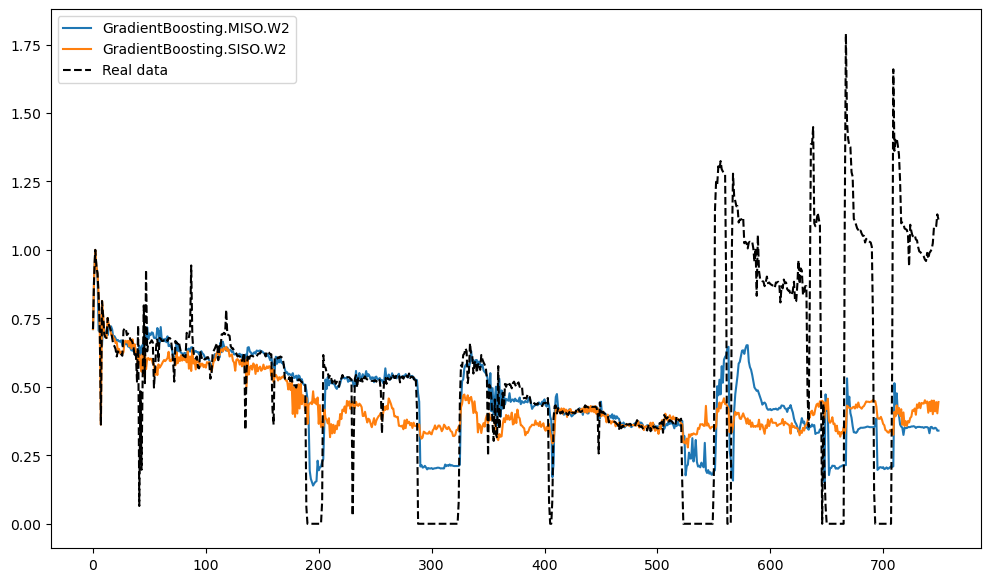

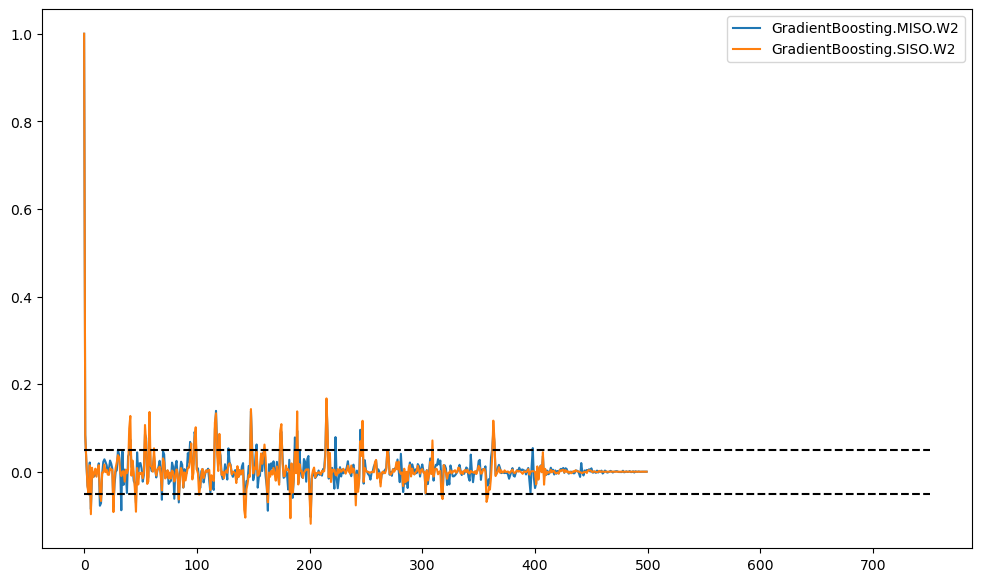

In [31]:
fig, ax   = plt.subplots(1,1, figsize=(12,7))
fig2, ax2 = plt.subplots(1,1, figsize=(12,7))
for model, yhat, yhat_OSA in yhats:
    if not 'GradientBoosting' in model: continue
    ax.plot(yhat, label=model)
    ee = compute_residues_autocorrelation(y_te[:500], yhat_OSA[:500])
    ax2.plot(ee[0], label=model)
ax.plot(y_te, 'k--', label='Real data')
ax.legend()
ax2.legend()
ax2.hlines(0.05, 0, len(y_te), 'k', 'dashed')
ax2.hlines(-0.05, 0, len(y_te), 'k', 'dashed')